<a href="https://colab.research.google.com/github/sapanapawar/Play-Store-App-Reviews-Analysis/blob/main/Play_Store_App_Review_Analysis(Pawar_Sapana)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#About Play Store

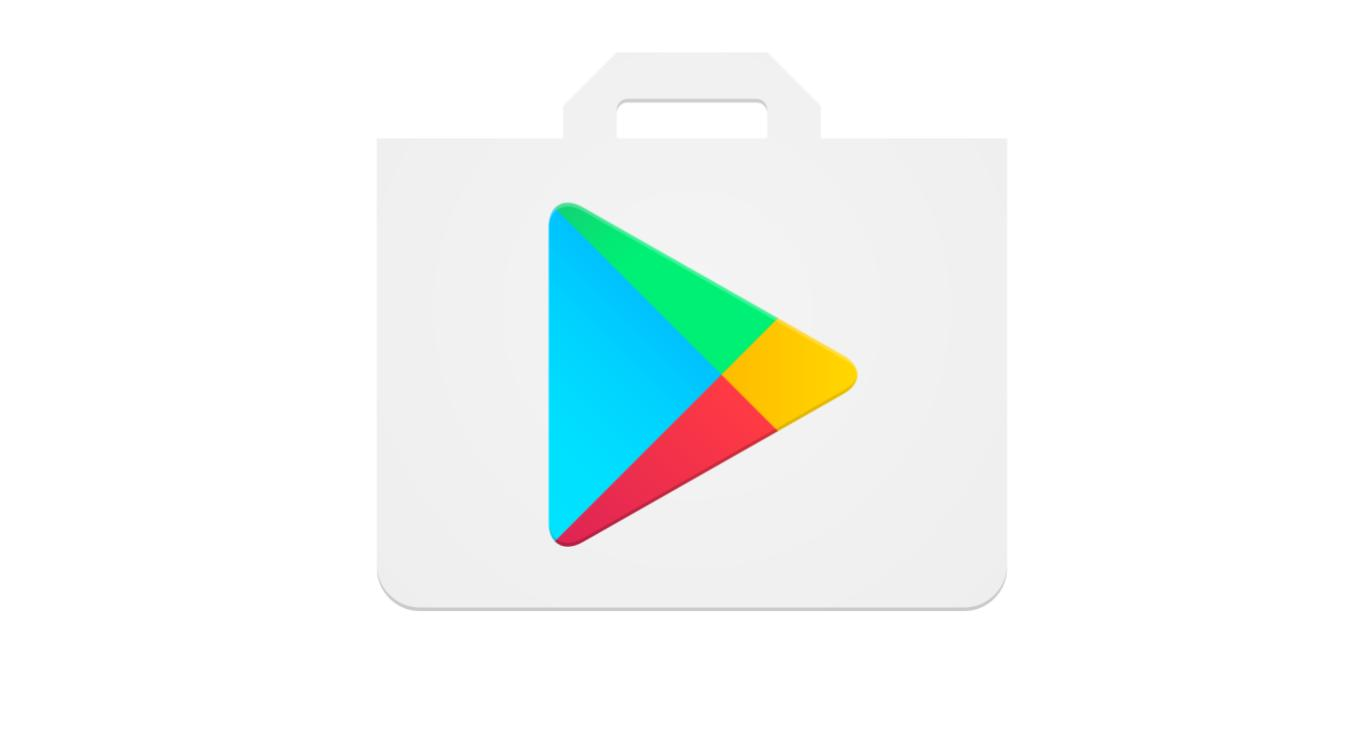

Google Play, also branded as the Google Play Store and formerly Android Market, is a digital distribution service operated and developed by Google. It serves as the official app store for certified devices running on the Android operating system and its derivatives as well as Chrome OS, allowing users to browse and download applications developed with the Android software development kit (SDK) and published through Google. Google Play also serves as a digital media store, offering music, books, movies, and television programs.Content that has been purchased on Google Play Movies & TV and Google Play Books can be accessed on a web browser, and through the Android and iOS apps.



Applications are available through Google Play either free of charge or at a cost. They can be downloaded directly on an Android device through the proprietary Play Store mobile app or by deploying the application to a device from the Google Play website.

#To perform EDA on given dataset we have prepared some questions and answered them to get some meaningfull conclusions.
#1.How distribution of Rating and size look like?
#2.What is the average rating per category?
#3.Which category has high number of installs? Get 5 most installed apps with corresponding number of installs.
#4.Which category have most paid type of apps? Find out the top 5 apps having highest price.
#5.What is the percentage of paid and free apps?
#6.What are the installs per content rating of apps?
#7.Visualize the correlation between all the columns with the help of heatmap.

#Import Python Libraries

In [72]:
# Importing Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Mount drive & load the dataset


In [73]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
#Working directory path
file_path = '/content/drive/MyDrive/pd csv file/Copy of Play Store Data.csv'

In [75]:
#Reading the dataset
df = pd.read_csv(file_path)

#Exploration


In [76]:
# We will see how the dataframe look like
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Understanding Features



*  App - Name of an application

*   Category- App Category

*   Rating - App Rating from the user

*   Review - App Review

*   Size - App Size

*   Installs - Installations Information

*   Type - App Type (Free /Paid)

*   Price - App Price

*   Content -Age Restriction

*   Genres - App Genres

*   Last Updated -Last update date



In [77]:
# Observing first five rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [78]:
#Observing last 5 rows
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [79]:
#Checking for number of rows and columns
df.shape

(10841, 13)

In [80]:
#Basics information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [81]:
#Let's see the descriptive summary 
df.describe(include= 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Outliers

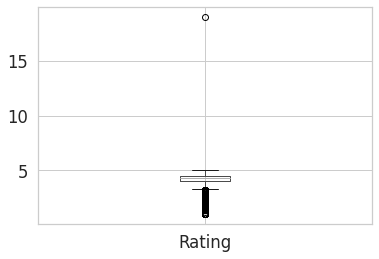

In [82]:
#Checking for outliers by plotting boxplot.
df.boxplot()

In [83]:
#Checking for outliers presnt in Rating column
df[df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [84]:
#Get the index of outlier
df['Rating'].idxmax()

10472

In [85]:
#Removing outlier
df.drop([df['Rating'].idxmax()], inplace= True)

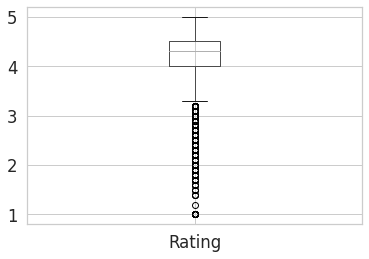

In [86]:
#After removing outlier
df.boxplot()

#Looking for and handling NaN / Null / Missing values

In [87]:
#Getting the number of null values present in each column 
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

#Data Imputation and Manipulation

In [88]:
#Replacing NaN values present in Rating column with median.
df['Rating'].fillna(df['Rating'].median(),inplace=True)

In [89]:
#Check for null values
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [90]:
#Replacing NaN value present in Categorical columns with mode values of that particular columns
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]), inplace=True)
df['Type'].fillna(str(df['Type'].mode().values[0]), inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]), inplace=True)

In [91]:
#After removing NaN values
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Now there is no any null value in dataframe.

In [92]:
#Checking datatype of the columns
print(type(df['Rating'][0]))
print(type(df['Installs'][0]))
print(type(df['Reviews'][0]))
print(type(df['Price'][0]))

<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'str'>


As we can see their is only one column named 'Rating' is datatype as float. On observing the dataset we can see that some of columns have integer and float values but the datatype of that column is 'Object'. So to do analysis we have to change the datatype of that columns to int/float.

In [93]:
# Let's convert 'Price' , 'Reviews' and 'Installs' into Numerical Values
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))
df['Reviews'] = df['Reviews'].apply(lambda x: float(x))

In [94]:
type(df['Price'][0])

numpy.float64

In [95]:
type(df['Reviews'][0])

numpy.float64

Installs: The value of installs is in “string” format. It contains numeric values with commas. It should be removed. And also, the ‘+’ sign should be removed from the end of each string.

In [96]:
#Converting the datatype of 'Installs' column to float
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

In [97]:
type(df['Installs'][0])

numpy.float64

In [98]:
# Change Last update into a datetime column
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [99]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


Size: The size of the app is in “string” format. We need to convert it into a numeric value. If the size is “10M”, then ‘M’ needs to be removed to get the numeric value of ‘10’. If the size is “512k”, which depicts app size in kilobytes, the first ‘k’ should be removed and the size should be converted to an equivalent of ‘megabytes’.

In [100]:
#check unique values of size column
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [101]:
#Checking the type of value present in Size column
type(df['Size'][0])

str

In [102]:
#As we can see some of values are in 'MB' and some values are in 'k' 
#WE have to convert all the values in 'MB'
#Creating a function which convert all values in 'MB' and get a float value of it.

def convert_to_MB(column):
  if "M" in column:
    result = float(column.split('M')[0])
  elif "k" in column:
    result = float(column.split("k")[0]) * 0.001
  elif column == "Varies with device":
    result = np.NaN
  return result

In [103]:
#creating a new column having every size in MB and float number.
#replace all NaN values with the mean of size.
df["Size_in_MB"]=df.Size.apply(convert_to_MB)
df["Size_in_MB"].fillna(value=df.Size_in_MB.mean(), inplace=True)

In [104]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2.8


#1.How distribution of Rating and size look like?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of App Ratings')

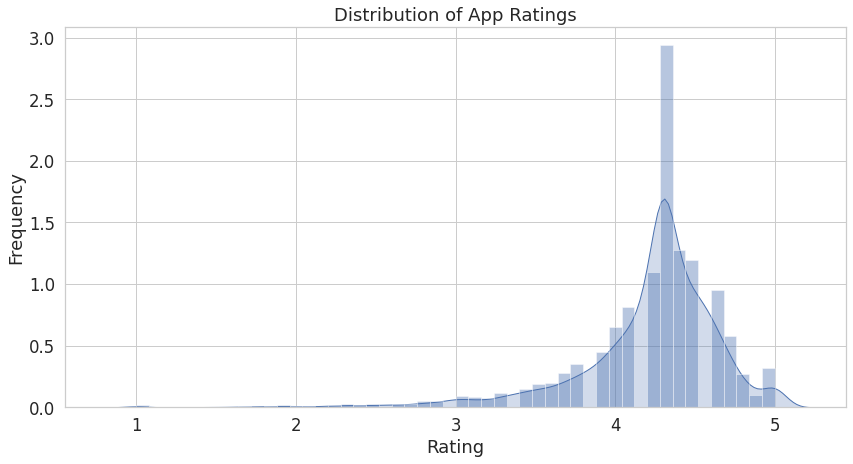

In [105]:
#plot a distplot of Rating column
plt.figure(figsize=(14,7))
sns.set(font_scale=1.5, style = "whitegrid")

sns.distplot(df['Rating'],color='b',label='',hist=True,kde_kws={"shade": True})
plt.ylabel("Frequency")
plt.title("Distribution of App Ratings")

From above distplot we can conclude that most of the apps have rating in between 3 and 5.

In [106]:
df['Rating'].value_counts().head()

4.3    2550
4.4    1109
4.5    1038
4.2     952
4.6     823
Name: Rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of App Size')

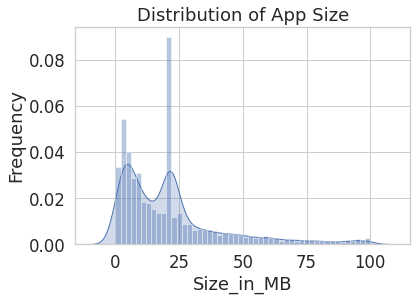

In [107]:
#plot a distplot of Size_in_MB column
sns.distplot(df['Size_in_MB'],color='b',label='',hist=True,kde_kws={"shade": True})
plt.ylabel("Frequency")
plt.title("Distribution of App Size")

Maximum number of applications present in the dataset are of small size.

#2.What is the average rating per category?

In [108]:
#Groupby operation
g = df.groupby('Category')['Rating'].mean()
g

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

Text(0, 0.5, 'Rating ')

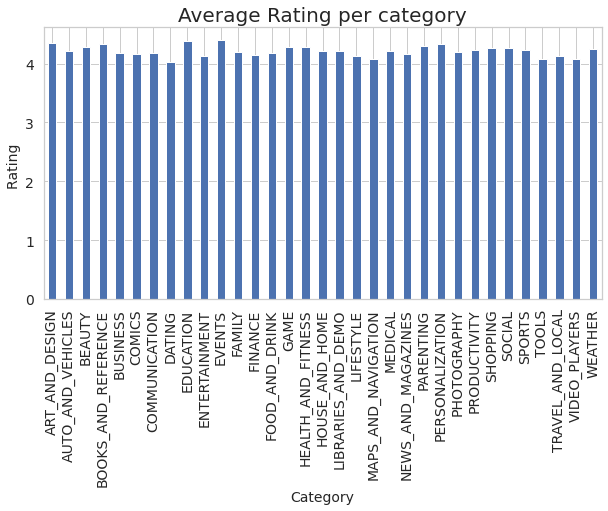

In [109]:
ax = g.plot.bar(figsize = (10,5),fontsize = 14)
ax.set_title("Average Rating per category", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Category", fontsize = 14)
ax.set_ylabel("Rating ", fontsize = 14)

From above visualization we can see that all categories of apps have more than 4 average rating.

#3.Which category has high number of installs? Get 5 most installed apps with corresponding number of installs.



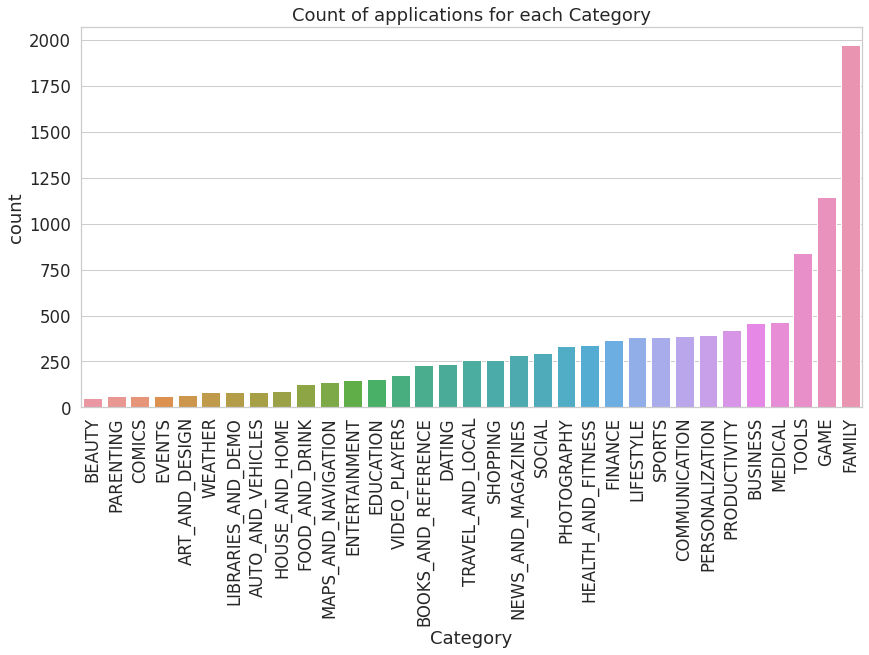

In [110]:
#Plotting category wise counts of apps
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of application")
plt.title("Count of applications for each Category")
sns.countplot(x ='Category', data = df,order=df['Category'].value_counts().sort_values().index)
plt.show()

The categories Family, Game and tools have most apps on Play Store.

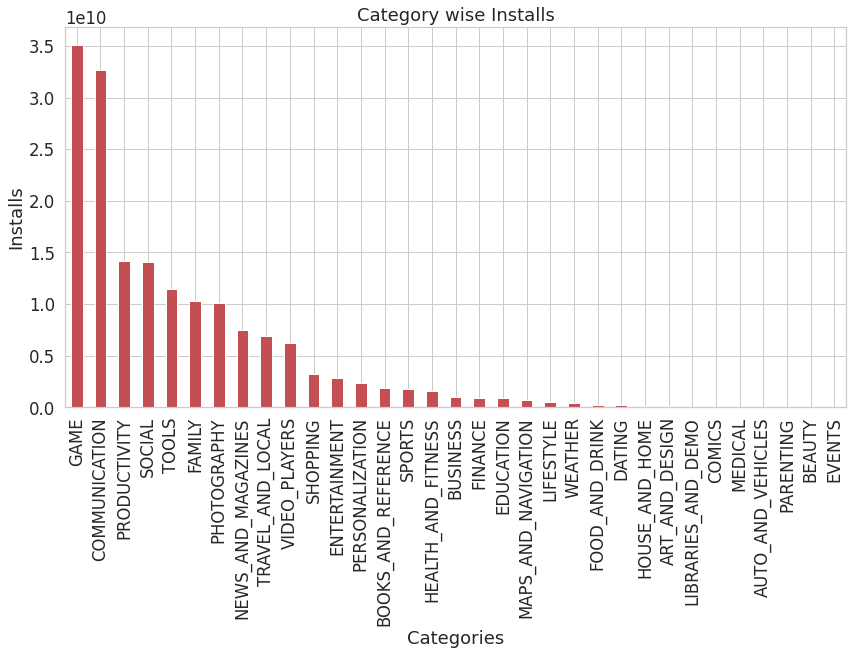

In [111]:
#Plotting a bar graph of category wise Instals.
plt.figure(figsize=(14,7))
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).plot(kind='bar',color='r')
plt.title('Category wise Installs')
plt.xlabel('Categories')
plt.ylabel('Installs')
plt.show()

Maximum installed apps come under Game and Communication.

In [112]:
#Creating new dataframe of only two columns
new_df4 = df[['App','Installs']]
new_df4.head()

,App,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,10000.0
1,Coloring book moana,500000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000.0
3,Sketch - Draw & Paint,50000000.0
4,Pixel Draw - Number Art Coloring Book,100000.0


In [113]:
#Get 5 most Installed apps
new_df4[['App','Installs']].sort_values(by='Installs',ascending=False).head()

,App,Installs
3896,Subway Surfers,1.000000e+09
3943,Facebook,1.000000e+09
335,Messenger – Text and Video Chat for Free,1.000000e+09
3523,Google Drive,1.000000e+09
3565,Google Drive,1.000000e+09


Subway Surfers, Facebook, Messenger and Google Drive are the most installed apps.